In [4]:
from nilmtk.api import API
from disaggregate import ADAE, DAE, Seq2Point, Seq2Seq, WindowGRU, RNN
import warnings
warnings.filterwarnings("ignore")

path = 'D:/workspace/nilm/code/databank/redd_data.h5'

In [4]:


ex1 = {
    'power': {
        'mains': ['apparent', 'active'],
        'appliance': ['apparent', 'active']
    },
    'sample_rate': 6,

    'appliances': ['microwave', 'fridge', 'washing machine'],
    'methods': {
        'ADAE': ADAE({'sequence_length': 1800, 'n_epochs': 200, 'batch_size': 16}),
         'DAE': DAE({'n_epochs': 50, 'batch_size': 1024}),
         'Seq2Point': Seq2Point({'n_epochs': 50, 'batch_size': 1024}),
         'Seq2Seq': Seq2Seq({'n_epochs': 50, 'batch_size': 1024}),
         'WindowGRU': WindowGRU({'n_epochs': 30, 'batch_size': 1024}),
         'RNN': RNN({'n_epochs': 50, 'batch_size': 1024})
    },
    'train': {
        'datasets': {
            'Dataport': {
                'path': path,
                'buildings': {
                    1: {
                        'start_time': '2011-04-18',
                        'end_time': '2011-05-24'
                    },
                    3: {
                        'start_time': '2011-04-16',
                        'end_time': '2011-05-30'
                    }
                    # 1: {
                    #     'start_time': '2011-04-18',
                    #     'end_time': '2011-04-19'
                    #     },
                }

            }
        }
    },
    'test': {
        'datasets': {
            'Datport': {
                'path': path,
                'buildings': {
                    2: {
                        'start_time': '2011-04-17',
                        'end_time': '2011-05-22'
                    },
                }
            }
        },
        'metrics': ['mae', 'mse']
    }
}


Joint Testing for all algorithms
Loading data for  Datport  dataset
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Generating predictions for : ADAE
Generating predictions for : DAE
Generating predictions for : Seq2Point
Generating predictions for : Seq2Seq
Generating predictions for : WindowGRU
Generating predictions for : RNN
............  mae  ..............
                      ADAE        DAE  Seq2Point    Seq2Seq  WindowGRU  \
microwave        15.935497   9.922993   9.760086  10.073832  10.213315   
fridge           29.100485  47.698902  43.425880  50.222954  36.502480   
washing machine   6.686287   5.672218   7.872388   7.811110   5.405689   

                       RNN  
microwave        10.731384  
fridge           40.317566  
washing machine   9.725885  
Loss function  mse  is not supported currently!


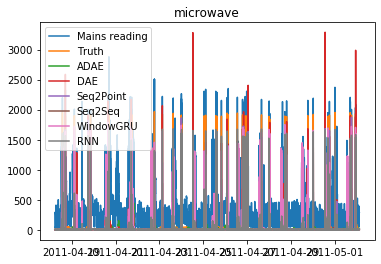

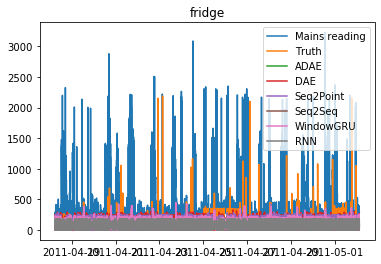

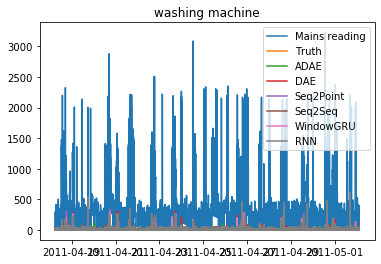

In [5]:

res = API(ex1)

In [2]:


ex2 = {
    'power': {
        'mains': ['apparent', 'active'],
        'appliance': ['apparent', 'active']
    },
    'sample_rate': 6,

    'appliances': ['microwave', 'fridge', 'washing machine'],
    'methods': {
        'ADAE': ADAE({'sequence_length': 1800, 'n_epochs': 100, 'batch_size': 16}),
         'DAE': DAE({'n_epochs': 50, 'batch_size': 1024}),
         'Seq2Point': Seq2Point({'n_epochs': 50, 'batch_size': 1024}),
         'Seq2Seq': Seq2Seq({'n_epochs': 50, 'batch_size': 1024}),
         'WindowGRU': WindowGRU({'n_epochs': 30, 'batch_size': 1024}),
         'RNN': RNN({'n_epochs': 50, 'batch_size': 1024})
    },
    'train': {
        'datasets': {
            'Dataport': {
                'path': path,
                'buildings': {
                    1: {
                        'start_time': '2011-04-18',
                        'end_time': '2011-05-24'
                    },
                    3: {
                        'start_time': '2011-04-16',
                        'end_time': '2011-05-30'
                    }
                    # 1: {
                    #     'start_time': '2011-04-18',
                    #     'end_time': '2011-04-19'
                    #     },
                }

            }
        }
    },
    'test': {
        'datasets': {
            'Datport': {
                'path': path,
                'buildings': {
                    2: {
                        'start_time': '2011-04-17',
                        'end_time': '2011-05-22'
                    },
                }
            }
        },
        'metrics': ['mae', 'mse']
    }
}


### 改变滑动窗口步长 60

Joint Testing for all algorithms
Loading data for  Datport  dataset
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Generating predictions for : ADAE
Generating predictions for : DAE
Generating predictions for : Seq2Point
Generating predictions for : Seq2Seq
Generating predictions for : WindowGRU
Generating predictions for : RNN
............  mae  ..............
                      ADAE        DAE  Seq2Point    Seq2Seq  WindowGRU  \
microwave        16.600578  10.199646  10.550896  11.294112  10.007292   
fridge           25.965195  44.875801  38.749245  44.173695  31.796021   
washing machine  41.734814   7.064944   7.435551   3.754872   6.721659   

                       RNN  
microwave         9.018119  
fridge           44.812222  
washing machine   4.944375  
Loss function  mse  is not supported currently!


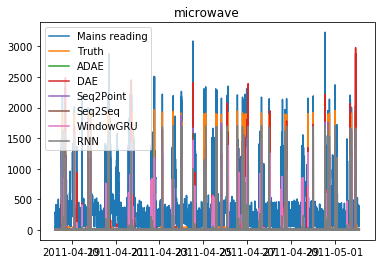

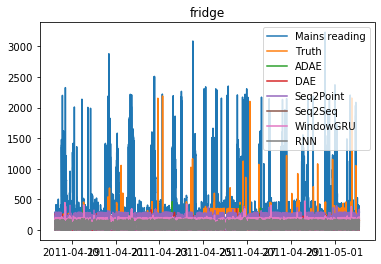

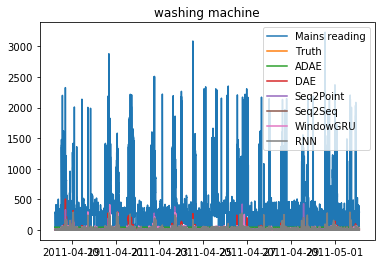

In [3]:

res = API(ex2)

### 滑动窗口:300，downsampling:2

In [2]:
ex3 = {
    'power': {
        'mains': ['apparent', 'active'],
        'appliance': ['apparent', 'active']
    },
    'sample_rate': 6,

    'appliances': ['microwave', 'fridge', 'washing machine'],
    'methods': {
        'ADAE': ADAE({'sequence_length': 1800, 'n_epochs': 100, 'batch_size': 16}),
#          'DAE': DAE({'n_epochs': 50, 'batch_size': 1024}),
#          'Seq2Point': Seq2Point({'n_epochs': 50, 'batch_size': 1024}),
#          'Seq2Seq': Seq2Seq({'n_epochs': 50, 'batch_size': 1024}),
#          'WindowGRU': WindowGRU({'n_epochs': 30, 'batch_size': 1024}),
#          'RNN': RNN({'n_epochs': 50, 'batch_size': 1024})
    },
    'train': {
        'datasets': {
            'Dataport': {
                'path': path,
                'buildings': {
                    1: {
                        'start_time': '2011-04-18',
                        'end_time': '2011-05-24'
                    },
                    3: {
                        'start_time': '2011-04-16',
                        'end_time': '2011-05-30'
                    }
                    # 1: {
                    #     'start_time': '2011-04-18',
                    #     'end_time': '2011-04-19'
                    #     },
                }

            }
        }
    },
    'test': {
        'datasets': {
            'Datport': {
                'path': path,
                'buildings': {
                    2: {
                        'start_time': '2011-04-17',
                        'end_time': '2011-05-22'
                    },
                }
            }
        },
        'metrics': ['mae', 'mse']
    }
}


In [5]:
res = API(ex3)

Started training for  ADAE
Joint training for  ADAE
............... Loading Data for training ...................
Loading data for  Dataport  dataset
Loading building ...  1
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Train Jointly
(512778, 1) (512778, 1) MultiIndex(levels=[['power'], ['apparent']],
           codes=[[0], [0]],
           names=['physical_quantity', 'type']) MultiIndex(levels=[['power'], ['active']],
           codes=[[0], [0]],
           names=['physical_quantity', 'type'])
Loading building ...  3
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=14, building=3, dataset='REDD')     
Done loading data all meters for this chu

ValueError: Found input variables with inconsistent numbers of samples: [3715, 18571]